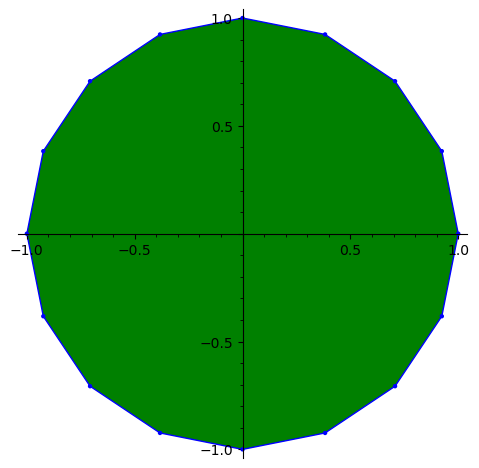

In [24]:
P = polytopes.regular_polygon(16, exact=False)
P.plot()

#Correction : P = polytopes.regular_polygon(16, exact=False)


# Function regular_polygon :

class Polytopes:  
    """
    A class of constructors for commonly used, famous, or interesting
    polytopes.
    """

    def regular_polygon(self, n, exact=True, base_ring=None, backend=None):
        """
        Return a regular polygon with `n` vertices.

        INPUT:

        - ``n`` -- positive integer; the number of vertices

        - ``exact`` -- boolean (default: ``True``); if ``False`` floating point
          numbers are used for coordinates

        - ``base_ring`` -- a ring in which the coordinates will lie. It is
          ``None`` by default. If it is not provided and ``exact`` is ``True``
          then it will be the field of real algebraic number, if ``exact`` is
          ``False`` it will be the real double field.

        - ``backend`` -- the backend to use to create the polytope

        EXAMPLES::

            sage: # needs sage.rings.number_field
            sage: octagon = polytopes.regular_polygon(8)
            sage: octagon
            A 2-dimensional polyhedron in AA^2 defined as the convex hull of 8 vertices
            sage: octagon.n_vertices()
            8
            sage: v = octagon.volume()
            sage: v
            2.828427124746190?
            sage: v == 2*QQbar(2).sqrt()
            True

        Its non exact version::

            sage: polytopes.regular_polygon(3, exact=False).vertices()
            (A vertex at (0.0, 1.0),
             A vertex at (0.8660254038, -0.5),
             A vertex at (-0.8660254038, -0.5))
            sage: polytopes.regular_polygon(25, exact=False).n_vertices()
            25

        TESTS::

            sage: # optional - pynormaliz, needs sage.rings.number_field
            sage: octagon = polytopes.regular_polygon(8, backend='normaliz')
            sage: octagon
            A 2-dimensional polyhedron in AA^2 defined as the convex hull of 8 vertices
            sage: octagon.n_vertices()
            8
            sage: octagon.volume()
            2*a
            sage: TestSuite(octagon).run()      # long time

            sage: TestSuite(polytopes.regular_polygon(5, exact=False)).run()
        """
        n = ZZ(n)
        if n <= 2:
            raise ValueError("n (={}) must be an integer greater than 2".format(n))

        if base_ring is None:
            if exact:
                from sage.rings.qqbar import AA as base_ring
            else: 
                from sage.rings.real_double import RDF as base_ring
        try:
            omega = 2*base_ring.pi() / n
            verts = [((i*omega).sin(), (i*omega).cos()) for i in range(n)]
        except AttributeError:
            from sage.rings.qqbar import QQbar
            z = QQbar.zeta(n)
            verts = [(base_ring((z**k).imag()), base_ring((z**k).real())) for k in range(n)]

        return Polyhedron(vertices=verts, base_ring=base_ring, backend=backend)



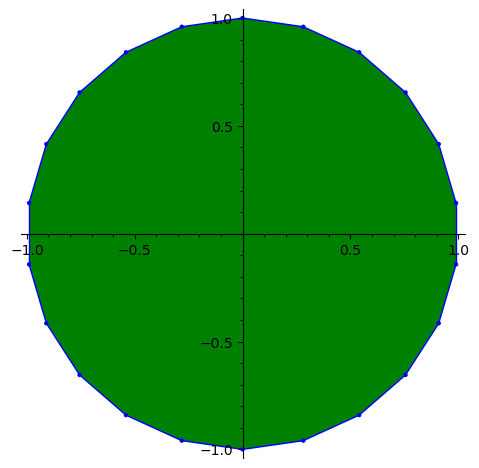

In [93]:
n = ZZ(22)

p = polytopes.regular_polygon(n, exact = True)

p.plot()



In [ ]:

n = ZZ(16)
if n <= 2:
    raise ValueError("n (={}) must be an integer greater than 2".format(n))

exact = True
base_ring = None

if base_ring is None:
    if exact:
        from sage.rings.qqbar import QQbar, AA
        base_ring = AA
    else:
        from sage.rings.real_double import RDF
        base_ring = RDF
try:
    omega = 2*base_ring.pi() / n
    verts = [((i*omega).sin(), (i*omega).cos()) for i in range(n)]
except AttributeError:
    from sage.rings.qqbar import QQbar, AA
    z = QQbar.zeta(n)
    verts = [(AA((z**k).imag()), AA((z**k).real())) for k in range(n)]
Polyhedron(vertices=verts, base_ring=base_ring, backend=None)


RecursionError: maximum recursion depth exceeded in comparison

# Note à moi-même :   

Le problème vien du fait qu'on fait des calculs avec des valeurs exact et non des valeurs approximée. Alors, la fonction fonctionne toujours tant que eaxact = false. 


La fonction regular_polygon est bonne, le return du Polyhedron pose problème 

J'ai trouvé le constructeur dans le fichier constructor

Dans tout les cas qu'on fait avec l'appel de regular_polygon, on tombe sur une V_Representation. 

L'erreur ne vient pas du constructeur de polyhedron en lui-même, il y a une erreur à la constrcuction de se dernier avec le return du parent

______________________________________________________________

L'erreur semble venir d'ici : self._numpy_dtype = numpy.dtype('float64'). 

Serait-ce une erreur de conversion de type ? 